**Brian Blaylock**  
*July 20, 2021*

# RRFS Data

The Rapid Refresh Forecast System is undergoing rapid development. There are prototype products available on the cloud on AWS. Some files have an index file, others do not.

In [1]:
from herbie.archive import Herbie
from toolbox.cartopy_tools import common_features, pc
from paint.standard2 import cm_tmp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
H = Herbie('2021-07-23', 
           model='rrfs', fxx=1)

🏋🏻‍♂️ Found 2021-Jul-23 00:00 UTC F01 [RRFS] [product=mean] GRIB2 file from local and index file from aws.                                                                                                                                                       


/p/home/blaylock/BB_python/HRRR_archive_download/herbie/archive.py:199: UserWarning: `product` not specified. Will use ["mean"].
  warnings.warn(f'`product` not specified. Will use ["{self.product}"].')


In [3]:
H.SOURCES

{'aws': 'https://noaa-rrfs-pds.s3.amazonaws.com/rrfs.20210723/00/ensprod/rrfsce.t00z.conus.mean.f01.grib2'}

In [4]:
x = H.xarray('TMP:2 m')

📇 Download subset: [RRFS] model [mean] product run at 2021-Jul-23 00:00 UTC F01                                                            
 cURL from file:///p/cwfs/blaylock/data/rrfs/20210723/mem01/rrfsce.t00z.conus.mean.f01.grib2
   1: GRIB_message=14  TMP:2 m above ground:1 hour fcst:wt ens mean


/p/home/blaylock/anaconda3/envs/basic38/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


Text(0.0, 1.0, 'RRFS: ensemble mean')

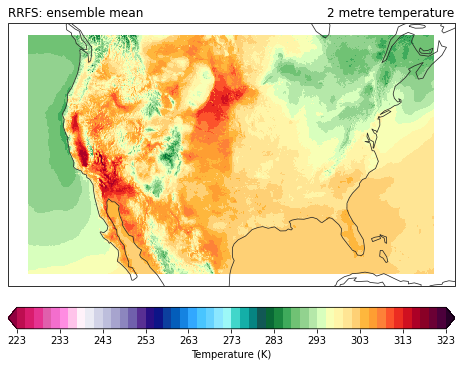

In [5]:
ax = common_features(crs=x.herbie.crs, figsize=[8,8])
p = ax.pcolormesh(x.longitude, x.latitude, x.t2m, 
              transform=pc, 
              **cm_tmp(units='K').cmap_kwargs)
plt.colorbar(p, ax=ax, 
             orientation='horizontal', pad=.05,
             **cm_tmp(units='K').cbar_kwargs)

ax.set_title(x.t2m.GRIB_name, loc='right')
ax.set_title(f"{H.model.upper()}: {H.product_description}", loc='left')

## What about when there isn't an index file available?
We have to download the full file.

In [8]:
H = Herbie('2021-07-23', 
           model='rrfs', product='testbed.conus', member=1, priority='aws-mem')

🏋🏻‍♂️ Found 2021-Jul-23 00:00 UTC F00 [RRFS] [product=testbed.conus] GRIB2 file from aws-mem and index file from None.                                                                                                                                                       


In [9]:
# no index file available. Have to download the full file.
H.download()

✅ Success! Downloaded RRFS from aws-mem             
	src: https://noaa-rrfs-pds.s3.amazonaws.com/rrfs.20210723/00/mem01/rrfs.t00z.mem01.testbed.conusf000.grib2
	dst: /p/cwfs/blaylock/data/rrfs/20210723/mem01/rrfsce.t00z.conus.testbed.conus.f00.grib2


In [10]:
import xarray

In [11]:
# Since we have the full file, we need to filter by keys to open the
# variable we want with cfgrib
x = xarray.open_dataset(
    H.get_localFilePath(), 
    engine='cfgrib', 
    backend_kwargs={'filter_by_keys': {'shortName': '2t',
                                       'typeOfLevel': 'heightAboveGround'}})

Text(0.0, 1.0, 'RRFS: member 1')

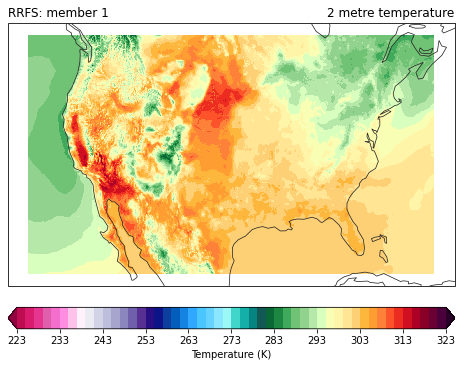

In [13]:
ax = common_features(crs=x.herbie.crs, figsize=[8,8])
p = ax.pcolormesh(x.longitude, x.latitude, x.t2m, 
              transform=pc, 
              **cm_tmp(units='K').cmap_kwargs)
plt.colorbar(p, ax=ax, 
             orientation='horizontal', pad=.05,
             **cm_tmp(units='K').cbar_kwargs)

ax.set_title(x.t2m.GRIB_name, loc='right')
ax.set_title(f"{H.model.upper()}: member {H.member}", loc='left')